<a href="https://colab.research.google.com/github/Bharath-K-Shetty/BandName-Generator/blob/main/DataPreprosessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50

# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 29
Non-outlier observations: 9971


In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


In [ ]:
# naive approach to normalizing the data before splitting the data and evaluating the model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))


Accuracy: 84.848


In [ ]:
#Cross-Validation Evaluation With Naive Data Preparation
# naive data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
# define dataset
#Creates a synthetic classification dataset.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #Fits the scaler to the data X and transforms the data,
# define the model
model = LogisticRegression()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))


Accuracy: 85.300 (3.513)


In [ ]:
# correct data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
#mean and standard deviation of the accuracy scores.


Accuracy: 85.400 (3.489)



Unique value count per column (NumPy):
Column 0: 238 unique values
Column 1: 297 unique values
Column 2: 927 unique values
Column 3: 933 unique values
Column 4: 179 unique values
Column 5: 375 unique values
Column 6: 820 unique values
Column 7: 618 unique values
Column 8: 561 unique values
Column 9: 57 unique values
Column 10: 577 unique values
Column 11: 59 unique values
Column 12: 73 unique values
Column 13: 107 unique values
Column 14: 53 unique values
Column 15: 91 unique values
Column 16: 893 unique values
Column 17: 810 unique values
Column 18: 170 unique values
Column 19: 53 unique values
Column 20: 68 unique values
Column 21: 9 unique values
Column 22: 1 unique values
Column 23: 92 unique values
Column 24: 9 unique values
Column 25: 8 unique values
Column 26: 9 unique values
Column 27: 308 unique values
Column 28: 447 unique values
Column 29: 392 unique values
Column 30: 107 unique values
Column 31: 42 unique values
Column 32: 4 unique values
Column 33: 45 unique values
Column

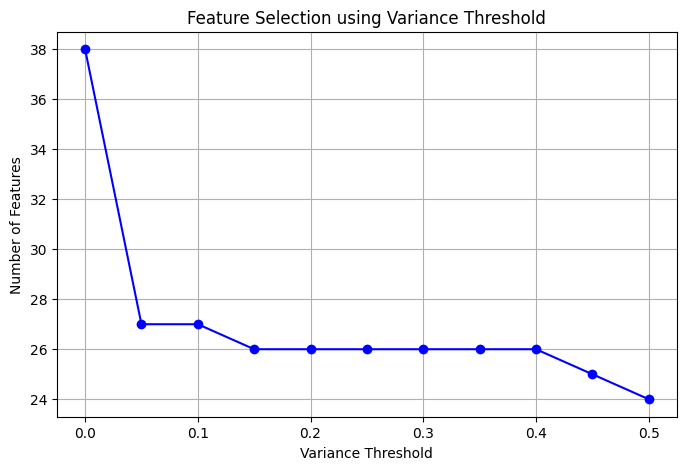

In [ ]:
import os
import numpy as np
import pandas as pd
from numpy import loadtxt, unique
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Check if file exists
filename = "oil-spill.csv"
if not os.path.exists(filename):
    print(f"Error: '{filename}' not found! Please ensure the file is in the correct directory.")
    exit()

# Load dataset using NumPy
data = loadtxt(filename, delimiter=',')

# Summarize unique values per column (NumPy)
print("\nUnique value count per column (NumPy):")
for i in range(data.shape[1]):
    print(f"Column {i}: {len(unique(data[:, i]))} unique values")

# Load dataset using Pandas
df = pd.read_csv(filename, header=None)

# Summarize unique values per column (Pandas)
print("\nUnique value counts per column (Pandas):\n", df.nunique())

# Delete columns with a single unique value
print("\nOriginal shape:", df.shape)
counts = df.nunique()
to_del = [i for i, v in enumerate(counts) if v == 1]
print("Columns to delete (single unique value):", to_del)

df.drop(to_del, axis=1, inplace=True)
print("New shape after column removal:", df.shape)

# Summarize percentage of unique values per column
print("\nPercentage of unique values per column:")
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = (num / data.shape[0]) * 100
    print(f"Column {i}: {num} unique values ({percentage:.1f}%)")

# Identify columns with <1% unique values
print("\nColumns with <1% unique values:")
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = (num / data.shape[0]) * 100
    if percentage < 1:
        print(f"Column {i}: {num} unique values ({percentage:.1f}%)")

# Delete columns with <1% unique values
print("\nOriginal shape before dropping low-variance columns:", df.shape)
counts = df.nunique()  # Recalculate after removing single-value columns
to_del = [i for i, v in enumerate(counts) if (v / df.shape[0] * 100) < 1]
print("Columns to delete (low variance <1% unique):", to_del)

df.drop(to_del, axis=1, inplace=True)
print("New shape after dropping low-variance columns:", df.shape)

# Feature selection using VarianceThreshold
data = df.values
X = data[:, :-1]  # All features
y = data[:, -1]   # Target column

print(f"\nFeature shape before variance threshold: {X.shape}, Target shape: {y.shape}")

# Apply VarianceThreshold
transform = VarianceThreshold()
X_sel = transform.fit_transform(X)
print("Feature shape after variance threshold:", X_sel.shape)

# Define thresholds for variance filtering
thresholds = np.arange(0.0, 0.55, 0.05)
results = []

# Apply transform with different thresholds
print("\nVariance Threshold Analysis:")
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print(f"> Threshold={t:.2f}, Remaining Features={n_features}")
    results.append(n_features)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(thresholds, results, marker='o', linestyle='-', color='b')
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Features")
plt.title("Feature Selection using Variance Threshold")
plt.grid()
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.datasets import load_iris

# Step 1: Check if 'iris.csv' exists, if not, create it
filename = "iris.csv"

if not os.path.exists(filename):
    print("File not found! Creating 'iris.csv'...")

    # Load the Iris dataset from sklearn
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target  # Add the target column

    # Save as CSV without headers
    df.to_csv(filename, index=False, header=False)
    print("Dataset saved as 'iris.csv'.\n")
else:
    print("File found! Loading dataset...\n")

# Step 2: Load the dataset
df = pd.read_csv(filename, header=None)

# Step 3: Identify duplicate rows
dups = df.duplicated()

# Step 4: Report duplicate status
print("Are there any duplicate rows?", dups.any())

# Step 5: List duplicate rows (if any)
if dups.any():
    print("\nDuplicate Rows:")
    print(df[dups])

# Step 6: Print original shape
print("\nOriginal shape:", df.shape)

# Step 7: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Step 8: Print new shape after removing duplicates
print("New shape after duplicate removal:", df.shape)

# Optional: Save the cleaned dataset
df.to_csv("iris_cleaned.csv", index=False, header=False)
print("\nCleaned dataset saved as 'iris_cleaned.csv'.")


File not found! Creating 'iris.csv'...
Dataset saved as 'iris.csv'.

Are there any duplicate rows? True

Duplicate Rows:
       0    1    2    3  4
142  5.8  2.7  5.1  1.9  2

Original shape: (150, 5)
New shape after duplicate removal: (149, 5)

Cleaned dataset saved as 'iris_cleaned.csv'.
